In [10]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [11]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [12]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [13]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)


# Discriminator

In [14]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)


In [15]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [16]:
# optimizers
# optim_g = optim.Adam(generator.parameters(), lr=0.0002)
# optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)
# from torch.optim import Nadam
optim_g = optim.RMSprop(generator.parameters(), lr=0.0002)
optim_d = optim.RMSprop(discriminator.parameters(), lr=0.0002)

In [17]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [18]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [19]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [20]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [21]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [22]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:07, 15.07it/s]                         


Epoch 1 of 100
Generator loss: 0.79009810, Discriminator loss: 1.21273258


118it [00:07, 15.75it/s]                         


Epoch 2 of 100
Generator loss: 1.12626397, Discriminator loss: 1.01202063


118it [00:07, 15.67it/s]                         


Epoch 3 of 100
Generator loss: 1.41967745, Discriminator loss: 0.99507658


118it [00:07, 16.18it/s]                         


Epoch 4 of 100
Generator loss: 1.59894816, Discriminator loss: 0.99490939


118it [00:07, 16.15it/s]                         


Epoch 5 of 100
Generator loss: 1.70669184, Discriminator loss: 1.00699090


118it [00:07, 16.01it/s]                         


Epoch 6 of 100
Generator loss: 1.73469033, Discriminator loss: 0.97645723


118it [00:07, 16.19it/s]                         


Epoch 7 of 100
Generator loss: 1.88049528, Discriminator loss: 0.89557466


118it [00:07, 15.61it/s]                         


Epoch 8 of 100
Generator loss: 2.10869293, Discriminator loss: 0.73085570


118it [00:07, 15.68it/s]                         


Epoch 9 of 100
Generator loss: 2.25855702, Discriminator loss: 0.65447344


118it [00:07, 15.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


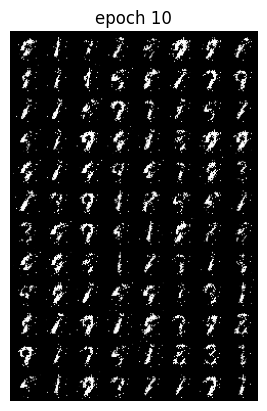

Epoch 10 of 100
Generator loss: 2.28878204, Discriminator loss: 0.66621840


118it [00:07, 15.75it/s]                         


Epoch 11 of 100
Generator loss: 2.21805537, Discriminator loss: 0.64667712


118it [00:07, 15.60it/s]                         


Epoch 12 of 100
Generator loss: 2.14072104, Discriminator loss: 0.66785428


118it [00:07, 15.68it/s]                         


Epoch 13 of 100
Generator loss: 2.16815963, Discriminator loss: 0.66767984


118it [00:07, 15.87it/s]                         


Epoch 14 of 100
Generator loss: 2.08175648, Discriminator loss: 0.72774112


118it [00:07, 15.47it/s]                         


Epoch 15 of 100
Generator loss: 1.93984088, Discriminator loss: 0.78401212


118it [00:07, 15.72it/s]                         


Epoch 16 of 100
Generator loss: 2.09502868, Discriminator loss: 0.68672776


118it [00:07, 15.59it/s]                         


Epoch 17 of 100
Generator loss: 1.95956956, Discriminator loss: 0.72857453


118it [00:07, 15.64it/s]                         


Epoch 18 of 100
Generator loss: 1.83394727, Discriminator loss: 0.81310336


118it [00:07, 15.87it/s]                         


Epoch 19 of 100
Generator loss: 1.77373387, Discriminator loss: 0.82425779


118it [00:07, 15.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


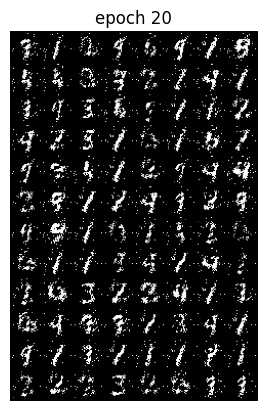

Epoch 20 of 100
Generator loss: 1.83848130, Discriminator loss: 0.79303330


118it [00:07, 15.47it/s]                         


Epoch 21 of 100
Generator loss: 1.75632062, Discriminator loss: 0.85083706


118it [00:07, 15.22it/s]                         


Epoch 22 of 100
Generator loss: 1.77244801, Discriminator loss: 0.83552204


118it [00:07, 15.83it/s]                         


Epoch 23 of 100
Generator loss: 1.80122424, Discriminator loss: 0.81335536


118it [00:07, 15.51it/s]                         


Epoch 24 of 100
Generator loss: 1.65842400, Discriminator loss: 0.89415541


118it [00:07, 15.70it/s]                         


Epoch 25 of 100
Generator loss: 1.67380995, Discriminator loss: 0.86723312


118it [00:07, 16.11it/s]                         


Epoch 26 of 100
Generator loss: 1.60747351, Discriminator loss: 0.89501134


118it [00:07, 15.89it/s]                         


Epoch 27 of 100
Generator loss: 1.58672566, Discriminator loss: 0.89446497


118it [00:07, 15.75it/s]                         


Epoch 28 of 100
Generator loss: 1.61112610, Discriminator loss: 0.90687536


118it [00:07, 15.72it/s]                         


Epoch 29 of 100
Generator loss: 1.51447128, Discriminator loss: 0.93744556


118it [00:07, 15.94it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


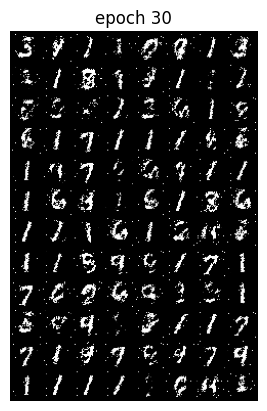

Epoch 30 of 100
Generator loss: 1.56303813, Discriminator loss: 0.92265757


118it [00:07, 16.28it/s]                         


Epoch 31 of 100
Generator loss: 1.60137342, Discriminator loss: 0.90976182


118it [00:07, 15.53it/s]                         


Epoch 32 of 100
Generator loss: 1.63510752, Discriminator loss: 0.89097291


118it [00:07, 15.74it/s]                         


Epoch 33 of 100
Generator loss: 1.58290710, Discriminator loss: 0.90331314


118it [00:07, 16.31it/s]                         


Epoch 34 of 100
Generator loss: 1.58977680, Discriminator loss: 0.89742550


118it [00:07, 15.89it/s]                         


Epoch 35 of 100
Generator loss: 1.64518915, Discriminator loss: 0.90957625


118it [00:07, 15.82it/s]                         


Epoch 36 of 100
Generator loss: 1.57708783, Discriminator loss: 0.88420345


118it [00:07, 15.82it/s]                         


Epoch 37 of 100
Generator loss: 1.60624916, Discriminator loss: 0.87376449


118it [00:07, 15.55it/s]                         


Epoch 38 of 100
Generator loss: 1.64237280, Discriminator loss: 0.86885329


118it [00:07, 15.44it/s]                         


Epoch 39 of 100
Generator loss: 1.63720944, Discriminator loss: 0.87536674


118it [00:07, 15.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


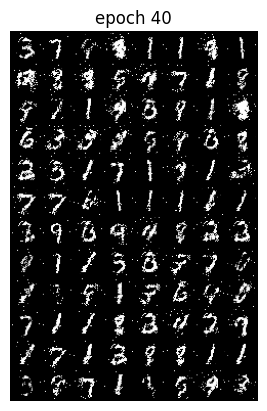

Epoch 40 of 100
Generator loss: 1.60701888, Discriminator loss: 0.88689217


118it [00:07, 15.83it/s]                         


Epoch 41 of 100
Generator loss: 1.61194809, Discriminator loss: 0.87695976


118it [00:07, 15.69it/s]                         


Epoch 42 of 100
Generator loss: 1.58384808, Discriminator loss: 0.89114124


118it [00:07, 15.68it/s]                         


Epoch 43 of 100
Generator loss: 1.53191019, Discriminator loss: 0.92346289


118it [00:07, 15.31it/s]                         


Epoch 44 of 100
Generator loss: 1.51378244, Discriminator loss: 0.94481286


118it [00:07, 15.70it/s]                         


Epoch 45 of 100
Generator loss: 1.51733303, Discriminator loss: 0.91921995


118it [00:07, 15.59it/s]                         


Epoch 46 of 100
Generator loss: 1.57434263, Discriminator loss: 0.89521251


118it [00:07, 15.50it/s]                         


Epoch 47 of 100
Generator loss: 1.57313737, Discriminator loss: 0.90595677


118it [00:07, 15.52it/s]                         


Epoch 48 of 100
Generator loss: 1.55587596, Discriminator loss: 0.91906745


118it [00:07, 15.53it/s]                         


Epoch 49 of 100
Generator loss: 1.55262847, Discriminator loss: 0.91364588


118it [00:07, 15.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


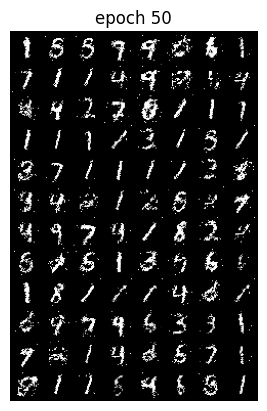

Epoch 50 of 100
Generator loss: 1.56806908, Discriminator loss: 0.89341561


118it [00:07, 15.83it/s]                         


Epoch 51 of 100
Generator loss: 1.58324552, Discriminator loss: 0.89965761


118it [00:07, 15.57it/s]                         


Epoch 52 of 100
Generator loss: 1.59945818, Discriminator loss: 0.89512702


118it [00:07, 16.09it/s]                         


Epoch 53 of 100
Generator loss: 1.58316133, Discriminator loss: 0.88337338


118it [00:07, 16.20it/s]                         


Epoch 54 of 100
Generator loss: 1.62221514, Discriminator loss: 0.87791507


118it [00:07, 15.40it/s]                         


Epoch 55 of 100
Generator loss: 1.58264423, Discriminator loss: 0.88275797


118it [00:07, 15.88it/s]                         


Epoch 56 of 100
Generator loss: 1.58546702, Discriminator loss: 0.89626561


118it [00:07, 16.03it/s]                         


Epoch 57 of 100
Generator loss: 1.60755594, Discriminator loss: 0.87122983


118it [00:07, 15.91it/s]                         


Epoch 58 of 100
Generator loss: 1.62726388, Discriminator loss: 0.86577348


118it [00:07, 16.06it/s]                         


Epoch 59 of 100
Generator loss: 1.54899117, Discriminator loss: 0.90599894


118it [00:07, 14.92it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


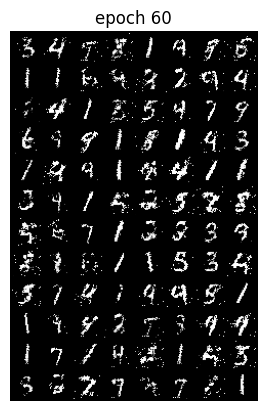

Epoch 60 of 100
Generator loss: 1.58644229, Discriminator loss: 0.89462533


118it [00:08, 14.33it/s]                         


Epoch 61 of 100
Generator loss: 1.60289515, Discriminator loss: 0.89097465


118it [00:07, 14.95it/s]                         


Epoch 62 of 100
Generator loss: 1.55440114, Discriminator loss: 0.90570112


118it [00:07, 15.06it/s]                         


Epoch 63 of 100
Generator loss: 1.60031941, Discriminator loss: 0.87740007


118it [00:07, 15.14it/s]                         


Epoch 64 of 100
Generator loss: 1.57138160, Discriminator loss: 0.90027790


118it [00:07, 15.51it/s]                         


Epoch 65 of 100
Generator loss: 1.55980672, Discriminator loss: 0.91359899


118it [00:07, 15.79it/s]                         


Epoch 66 of 100
Generator loss: 1.54151331, Discriminator loss: 0.91234348


118it [00:07, 15.83it/s]                         


Epoch 67 of 100
Generator loss: 1.56791830, Discriminator loss: 0.90709405


118it [00:08, 14.71it/s]                         


Epoch 68 of 100
Generator loss: 1.56449223, Discriminator loss: 0.90382242


118it [00:07, 14.80it/s]                         


Epoch 69 of 100
Generator loss: 1.51394463, Discriminator loss: 0.93841147


118it [00:07, 14.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


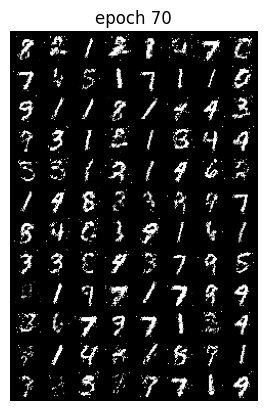

Epoch 70 of 100
Generator loss: 1.53135139, Discriminator loss: 0.91866047


118it [00:07, 15.25it/s]                         


Epoch 71 of 100
Generator loss: 1.55611880, Discriminator loss: 0.91488205


118it [00:07, 15.41it/s]                         


Epoch 72 of 100
Generator loss: 1.56216813, Discriminator loss: 0.91181791


118it [00:07, 15.58it/s]                         


Epoch 73 of 100
Generator loss: 1.53962193, Discriminator loss: 0.92284689


118it [00:07, 15.65it/s]                         


Epoch 74 of 100
Generator loss: 1.56689532, Discriminator loss: 0.89611830


118it [00:07, 15.83it/s]                         


Epoch 75 of 100
Generator loss: 1.51573048, Discriminator loss: 0.93382404


118it [00:07, 15.23it/s]                         


Epoch 76 of 100
Generator loss: 1.54309761, Discriminator loss: 0.91514116


118it [00:07, 14.89it/s]                         


Epoch 77 of 100
Generator loss: 1.57730817, Discriminator loss: 0.90610339


118it [00:07, 15.82it/s]                         


Epoch 78 of 100
Generator loss: 1.54413692, Discriminator loss: 0.90859011


118it [00:07, 15.61it/s]                         


Epoch 79 of 100
Generator loss: 1.57235580, Discriminator loss: 0.91885124


118it [00:07, 15.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


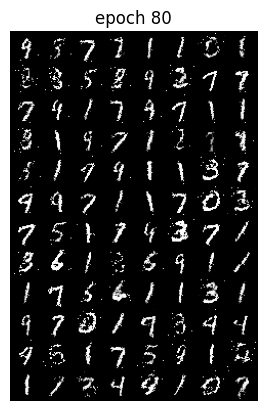

Epoch 80 of 100
Generator loss: 1.56035707, Discriminator loss: 0.91608755


118it [00:07, 15.59it/s]                         


Epoch 81 of 100
Generator loss: 1.53952901, Discriminator loss: 0.91898561


118it [00:07, 15.68it/s]                         


Epoch 82 of 100
Generator loss: 1.56456912, Discriminator loss: 0.90931539


118it [00:07, 15.39it/s]                         


Epoch 83 of 100
Generator loss: 1.54388441, Discriminator loss: 0.90767322


118it [00:07, 15.35it/s]                         


Epoch 84 of 100
Generator loss: 1.55949263, Discriminator loss: 0.91164589


118it [00:07, 15.36it/s]                         


Epoch 85 of 100
Generator loss: 1.55971574, Discriminator loss: 0.92338884


118it [00:07, 15.07it/s]                         


Epoch 86 of 100
Generator loss: 1.57911156, Discriminator loss: 0.88880626


118it [00:07, 16.15it/s]                         


Epoch 87 of 100
Generator loss: 1.57643082, Discriminator loss: 0.90602397


118it [00:07, 16.02it/s]                         


Epoch 88 of 100
Generator loss: 1.53734333, Discriminator loss: 0.93672641


118it [00:07, 15.76it/s]                         


Epoch 89 of 100
Generator loss: 1.56519727, Discriminator loss: 0.90517055


118it [00:07, 15.77it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


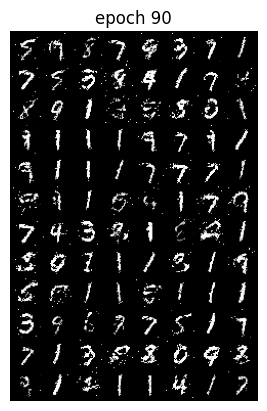

Epoch 90 of 100
Generator loss: 1.56843280, Discriminator loss: 0.91163736


118it [00:07, 15.43it/s]                         


Epoch 91 of 100
Generator loss: 1.54593994, Discriminator loss: 0.91017806


118it [00:07, 15.16it/s]                         


Epoch 92 of 100
Generator loss: 1.55835443, Discriminator loss: 0.91523869


118it [00:07, 15.57it/s]                         


Epoch 93 of 100
Generator loss: 1.56552678, Discriminator loss: 0.90269965


118it [00:07, 15.47it/s]                         


Epoch 94 of 100
Generator loss: 1.53372904, Discriminator loss: 0.92562403


118it [00:07, 15.89it/s]                         


Epoch 95 of 100
Generator loss: 1.56854499, Discriminator loss: 0.90212461


118it [00:07, 15.79it/s]                         


Epoch 96 of 100
Generator loss: 1.61871989, Discriminator loss: 0.87669347


118it [00:07, 15.57it/s]                         


Epoch 97 of 100
Generator loss: 1.57428268, Discriminator loss: 0.90162144


118it [00:07, 15.13it/s]                         


Epoch 98 of 100
Generator loss: 1.59972292, Discriminator loss: 0.89458033


118it [00:07, 15.53it/s]                         


Epoch 99 of 100
Generator loss: 1.57654930, Discriminator loss: 0.88663750


118it [00:07, 15.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


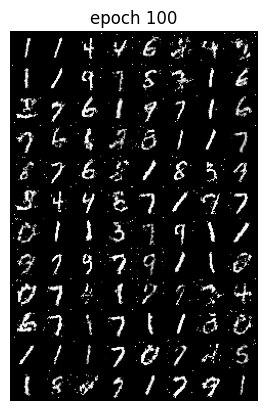

Epoch 100 of 100
Generator loss: 1.56406812, Discriminator loss: 0.89589736


In [23]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    example_loss = criterion(output[0],true_label[0])
    noise_loss = criterion(output[1],true_label[1])
    return example_loss + noise_loss
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g_val = 0.0
    loss_d_val = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        m=data[0].shape[0]
        real_label = label_real(m)
        fake_label = label_fake(m)
        real_data, _ = data
        real_data = real_data.to(device)
        
        ## traing discriminator
        noise = create_noise(m, nz)
        fake_data = generator(noise)
        real_output = discriminator(real_data)
        fake_output = discriminator(fake_data)
        loss_d = discriminator_loss([real_output,fake_output],[real_label,fake_label])
        optim_d.zero_grad()
        loss_d.backward()
        optim_d.step()
        
        ## training generator
        noise = create_noise(m, nz)
        fake_data = generator(noise)
        fake_output = discriminator(fake_data)
        optim_g.zero_grad()
        loss_g = generator_loss(fake_output,real_label)
        loss_g.backward()
        optim_g.step()
        
        loss_g_val += loss_g.item()
        loss_d_val += loss_d.item()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 10 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g_val / bi # total generator loss for the epoch
    epoch_loss_d = loss_d_val / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [24]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [25]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

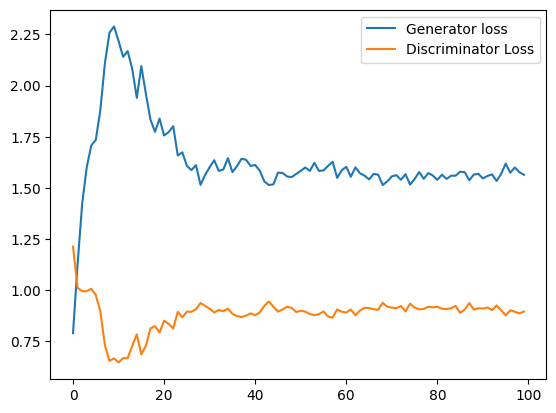

In [26]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')